In [113]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import plotly.express as px
import json

In [114]:
dataset = '../../data/caterpillar/labeled_caterpillar_data/labeled_1232423_0'
df_ = pd.read_hdf(f'{dataset}.h5', key='star')
print(len(df_))
df_.head()

145246


,jzstar,jrstar,jphistar,vxstar,vystar,vzstar,xstar,ystar,zstar,idstar,...,snapstar,massstar,timestar,redshiftstar,cluster_id,rstar,phistar,vrstar,vphistar,vstar
1023,3.913976,2.942013,0.998913,124.796979,37.549050,-234.705431,-0.023173,-0.014977,0.013292,162.0,...,313.0,8.940424e+07,13.490708,0.023572,1,0.027591,-2.567824,-125.193805,36.203979,268.460158
1024,3.371582,3.689807,-0.630306,227.036907,192.832058,-222.963716,-0.008629,-0.004552,-0.006305,162.0,...,313.0,8.940424e+07,13.490708,0.023572,1,0.009756,-2.656111,-290.784931,-64.607149,372.078995
1025,3.846088,3.880464,-0.308512,264.379767,181.723738,-188.605630,-0.008481,-0.004663,-0.007550,162.0,...,313.0,8.940424e+07,13.490708,0.023572,1,0.009678,-2.638930,-319.224084,-31.877306,372.145485
1026,3.103048,3.229659,-1.092135,289.216479,177.452692,-130.320542,-0.005593,0.000344,-0.010407,162.0,...,313.0,8.940424e+07,13.490708,0.023572,1,0.005604,3.080106,-277.765873,-194.889070,363.481875
1027,2.927352,3.279956,-1.074737,284.869115,152.610976,-72.580784,0.006111,0.007047,-0.014185,162.0,...,313.0,8.940424e+07,13.490708,0.023572,1,0.009328,0.856368,301.934890,-115.220851,331.222724


In [115]:
df_['cluster_id_name'] = [f'cluster {i}' for i in df_['cluster_id']]
print(len(df_))

145246


0.02697474653539623 0.03720550760951075 0.030355698626094295
110152


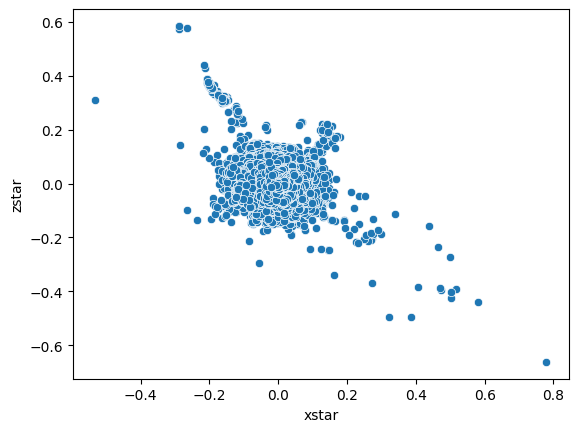

In [4]:
sns.scatterplot(data=df_, x='xstar', y='zstar')
print(np.std(df_['xstar']), np.std(df_['ystar']), np.std(df_['zstar']))
# 2.5 kpc --> 0.0025 
df_far = df_.copy()
df_far = df_far.loc[np.abs(df_far['zstar'])>0.0025]
print(len(df_far))

145246


<AxesSubplot: xlabel='rstar', ylabel='phistar'>

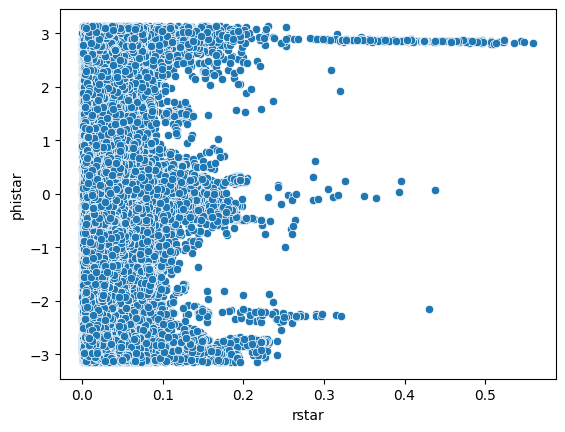

In [116]:
df_recent = df_.copy()
df_recent = df_recent.loc[df_recent['redshiftstar']<200]
print(len(df_recent))
sns.scatterplot(data=df_, x='rstar', y='phistar')

In [117]:
def sample_space(df_, radius=5, radius_sun=8, zsun_range=0.016, sample_size=1000, filter_size=None):
    df = df_.copy()
    phi = np.random.uniform(0, np.pi*2)
    xsun = np.cos(phi)*radius_sun
    ysun = np.sin(phi)*radius_sun
    zsun = np.random.normal(-zsun_range, zsun_range)
    df = df.loc[(df['xstar'].to_numpy()-xsun)**2 + (df['ystar'].to_numpy()-ysun)**2 + (df['zstar'].to_numpy()-zsun)**2 < radius**2]
    if len(df) > sample_size:
        sample_ids = np.random.choice(len(df), min(len(df), sample_size), replace=False)
        df = df.iloc[sample_ids].copy()
    return df

In [118]:
df_recent=sample_space(df_recent, radius=0.005, radius_sun=0.0082, zsun_range=0.016/1000, sample_size=1000000)
print(len(df_recent))

2395


In [100]:
xsun, ysun, zsun = 0, 0.008, 0.000016
radius = 0.005
df_recent = df_recent.loc[(df_recent['xstar'].to_numpy()-xsun)**2 + (df_recent['ystar'].to_numpy()-ysun)**2 + (df_recent['zstar'].to_numpy()-zsun)**2 < radius**2]
print(len(df_recent))

235


In [73]:
df_recent['jzstar-jrstar'] = df_recent['jzstar'] - df_recent['jrstar']

<AxesSubplot: xlabel='jphistar', ylabel='estar'>

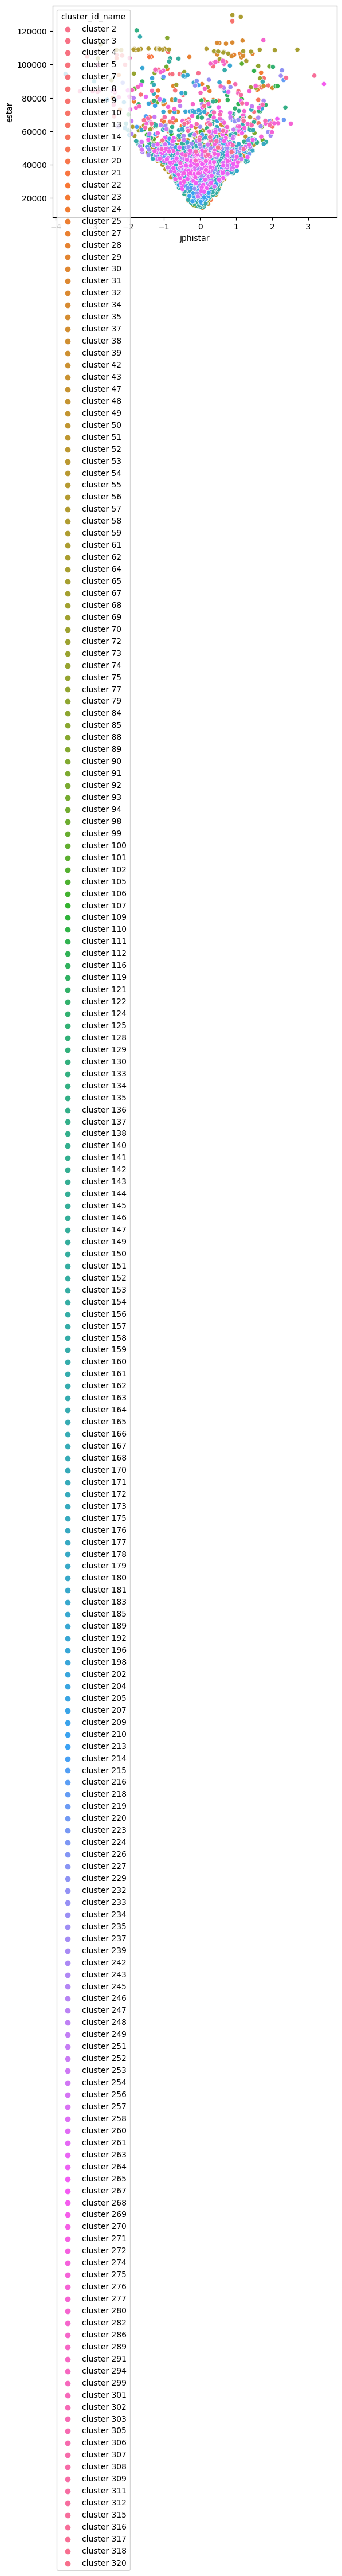

In [74]:
sns.scatterplot(data=df_recent, x='jphistar', y='estar', hue='cluster_id_name')

In [75]:
with open(f'{dataset}_norm.json') as f:
    df_norm_ = json.load(f)
features = ['jzstar', 'jrstar', 'jphistar', 'vxstar', 'vystar', 'vzstar', 'xstar', 'ystar', 'zstar', 'rstar', 'phistar', 'vrstar', 'vphistar', 'vstar', 'estar']

In [76]:
for feature in features:
    df_recent[feature] -= df_norm_['mean'][feature]
    df_recent[feature] /= df_norm_['std'][feature]

In [77]:
keep_ids = [id for id, count in Counter(df_recent['cluster_id']).most_common()[0:12]]
print(keep_ids)

[152, 54, 153, 59, 265, 180, 160, 90, 170, 157, 102, 55]


[(-3.0, 3.0),
 (-3.0, 3.0),
 (-3.0, 3.0),
 (-3.0, 3.0),
 (-3.0, 3.0),
 (-3.0, 3.0),
 (-3.0, 3.0),
 (-3.0, 3.0),
 (-3.0, 3.0),
 (-3.0, 3.0),
 (-3.0, 3.0),
 (-3.0, 3.0)]

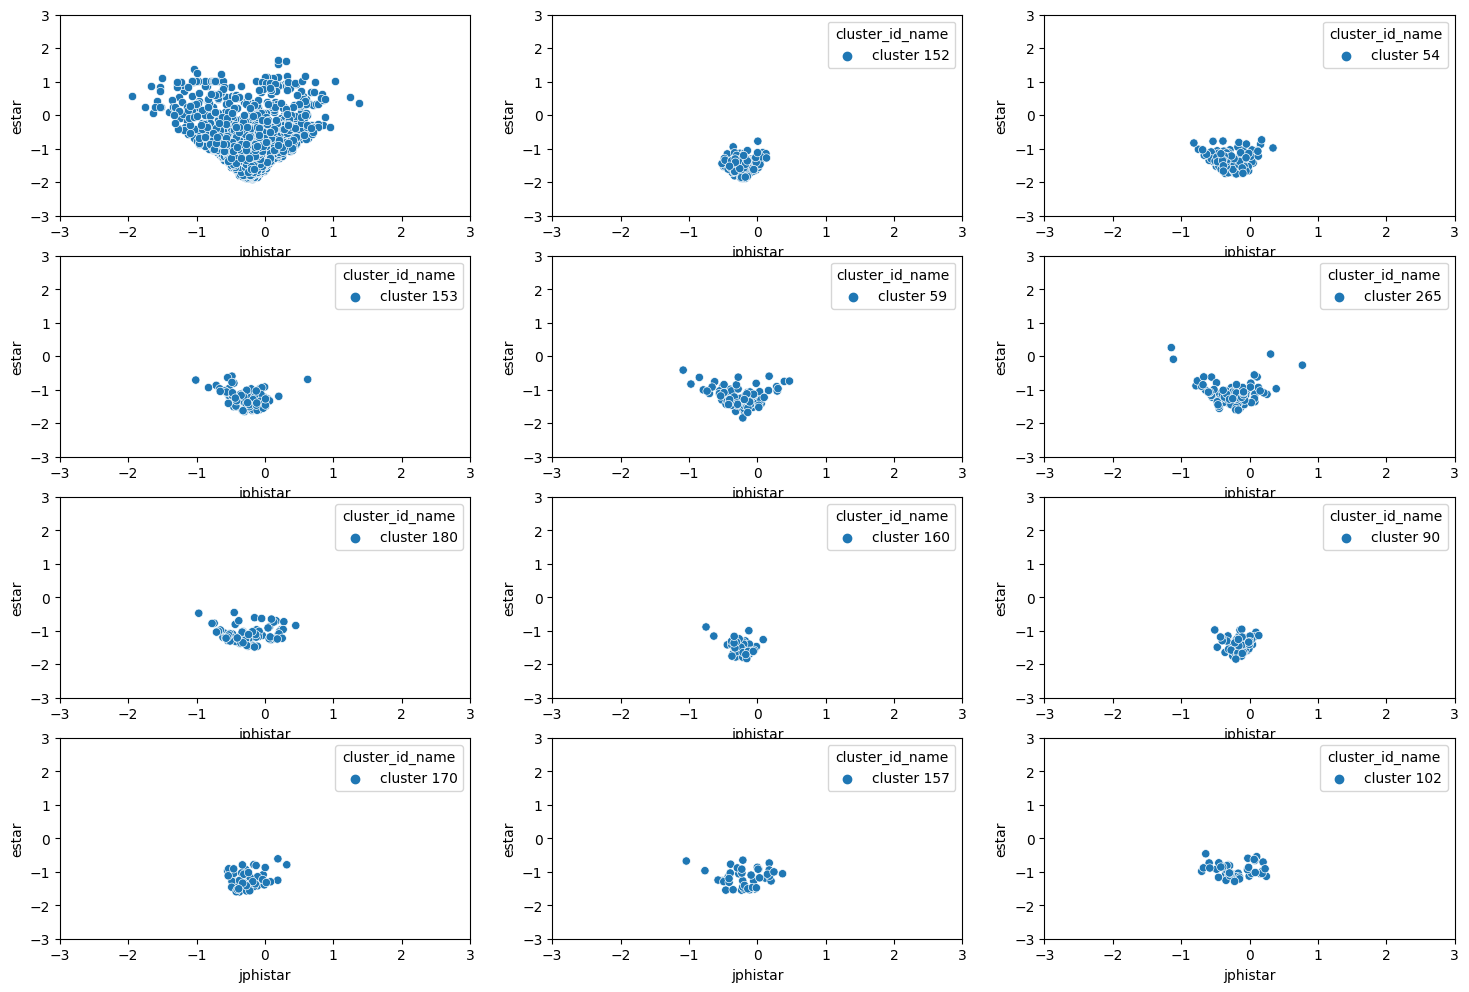

In [78]:
fig, axes = plt.subplots(4, 3, figsize=(18, 12))
x_var = 'jphistar'
y_var = 'estar'
sns.scatterplot(data=df_recent, ax=axes[0,0], x=x_var, y=y_var)
for id, ax in zip(keep_ids, axes.flatten()[1:]):
    chosen_ids = np.argwhere(df_recent['cluster_id'].isin([id]).to_numpy())[:,0]
    df = df_recent.iloc[chosen_ids].copy()
    sns.scatterplot(data=df, ax=ax, x=x_var, y=y_var, hue='cluster_id_name')
[ax.set_xlim(-3, 3) for ax in axes.flatten()]
[ax.set_ylim(-3, 3) for ax in axes.flatten()]